# Relatório de Balanço - FSC

In [1]:
#Importando todas as bibliotecas necessárias
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import xlsxwriter
import json

from datetime import date, time, datetime, timedelta
from pandas_ods_reader import read_ods
from pandas import Grouper
from pandas import ExcelWriter

#Configurando as cores dos gráficos
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("inferno")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [2]:
hoje = date.today()
um_dia = timedelta(days=1)
tres_dias = timedelta(days=3)

try:
    cotacao = hoje.strftime('%m-%d-%Y')
    dolar_dia = pd.read_json(f'https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao=%27{cotacao}%27&$top=100&$format=json&$select=cotacaoCompra', lines=True)
    dolar_dia = pd.DataFrame(dolar_dia['value'][0])['cotacaoCompra'][0]
except:
    try:
        cotacao = (hoje - um_dia).strftime('%m-%d-%Y')
        dolar_dia = pd.read_json(f'https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao=%27{cotacao}%27&$top=100&$format=json&$select=cotacaoCompra', lines=True)
        dolar_dia = pd.DataFrame(dolar_dia['value'][0])['cotacaoCompra'][0]
    except:
        cotacao = (hoje - tres_dias).strftime('%m-%d-%Y')
        dolar_dia = pd.read_json(f'https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao=%27{cotacao}%27&$top=100&$format=json&$select=cotacaoCompra', lines=True)
        dolar_dia = pd.DataFrame(dolar_dia['value'][0])['cotacaoCompra'][0]

In [3]:
entrada = pd.read_excel('Qualificação de Fornecedores.xlsx', sheet_name='Exportação Logix Excel')
entrada['Data entrada NF'] = pd.to_datetime(entrada['Data entrada NF'], format='%Y/%m/%d')
entrada = entrada[entrada['Familia'] == '103']

saida = pd.read_excel('Qualificação de Fornecedores.xlsx', sheet_name='Balanço FSC')
saida['DATA_EMISSAO'] = pd.to_datetime(saida['DATA_EMISSAO'], format='%Y/%m/%d')

## Inputs (Painéis Amadeirados MDF/MDP - W8)

### Quantidade Recebida

In [4]:
materia_prima = pd.DataFrame(entrada.groupby([Grouper(key='Data entrada NF', freq='MS')])['Quantidade recebida'].sum()).reset_index()
materia_prima = materia_prima.tail(13).head(12).rename(columns={'Data entrada NF':'ANO-MÊS','Quantidade recebida':'TOTAL RECEBIDO (M²)'})
materia_prima['ACUMULADO (M²)'] = materia_prima['TOTAL RECEBIDO (M²)'].cumsum()
materia_prima.set_index('ANO-MÊS').round(2).to_period('M')

,TOTAL RECEBIDO (M²),ACUMULADO (M²)
ANO-MÊS,,
2019-07,5824.66,5824.66
2019-08,3497.88,9322.54
2019-09,8729.32,18051.86
2019-10,18916.80,36968.66
2019-11,17244.64,54213.31
2019-12,2309.75,56523.06
2020-01,11534.16,68057.22
2020-02,16753.11,84810.33
2020-03,3631.65,88441.98


### Fornecedores

In [5]:
filter = (entrada['Data entrada NF'] >= materia_prima.reset_index()['ANO-MÊS'].min()) & (entrada['Data entrada NF'] <= materia_prima.reset_index()['ANO-MÊS'].max())
fornecedores = entrada[filter].rename(columns={'Data entrada NF':'ANO-MÊS','Quantidade recebida':'TOTAL RECEBIDO (M²)'})
fornecedores = pd.DataFrame(fornecedores.groupby(['Razão social'])['TOTAL RECEBIDO (M²)'].sum()).reset_index().sort_values('TOTAL RECEBIDO (M²)', ascending=False)
fornecedores['ACUMULADO (M²)'] = fornecedores['TOTAL RECEBIDO (M²)'].cumsum()
fornecedores.set_index('Razão social').round(2)

,TOTAL RECEBIDO (M²),ACUMULADO (M²)
Razão social,,
EUCATEX INDUSTRIA E COMERCIO LTDA,62121.68,62121.68
DURATEX S.A,22648.56,84770.23
DURATEX S/A,4371.84,89142.07
CACERES FLORESTAL S/A,16.00,89158.07


* Veja a qualificação dos fornecedores neste link: https://trademarkportal.fsc.org/portal/certStatus.php

<hr>

## Outputs (Mobiliário Corporativo - W12)

### Quantidade Consumida (W8 - PAINÉIS AMADEIRADOS em m²/W12 - Mobiliário Corporativo em PC)

In [6]:
consumo = pd.DataFrame(saida.groupby([Grouper(key='DATA_EMISSAO', freq='MS'),'COD_CLIENTE','NOM_CLIENTE','NOTA_FISCAL','ITEM_FINAL','DESCRICAO'])['QTD_SAIDA'].sum()).reset_index()
consumo = pd.DataFrame(consumo.groupby([Grouper(key='DATA_EMISSAO', freq='MS')])['QTD_SAIDA'].sum()).reset_index()
consumo = consumo.tail(13).head(12).rename(columns={'DATA_EMISSAO':'ANO-MÊS','QTD_SAIDA':'TOTAL CONSUMIDO (M²)'})
consumo['ACUMULADO (M²)'] = consumo['TOTAL CONSUMIDO (M²)'].cumsum()
consumo['TOTAL DE MÓVEIS VENDIDOS (PC)'] = pd.DataFrame(saida.groupby([Grouper(key='DATA_EMISSAO', freq='MS')])['QTD_NF'].sum()).reset_index()['QTD_NF']
consumo.set_index('ANO-MÊS').round(2).to_period('M')

,TOTAL CONSUMIDO (M²),ACUMULADO (M²),TOTAL DE MÓVEIS VENDIDOS (PC)
ANO-MÊS,,,
2019-07,5014.26,5014.26,10162
2019-08,4426.84,9441.10,6814
2019-09,2789.28,12230.38,4577
2019-10,5033.23,17263.61,7524
2019-11,3632.35,20895.96,6144
2019-12,5950.12,26846.08,9000
2020-01,3367.37,30213.46,6324
2020-02,4037.97,34251.42,6433
2020-03,2098.49,36349.91,4106


<hr>

## Comparativo (Inputs - Outputs)

In [7]:
comparativo = pd.DataFrame()
comparativo['ANO-MÊS'] = consumo.reset_index()['ANO-MÊS']
comparativo['INPUT ACUMULADO (M²)'] = materia_prima.reset_index()['ACUMULADO (M²)']
comparativo['OUTPUT ACUMULADO (M²)'] = consumo.reset_index()['ACUMULADO (M²)']
comparativo['ESTOQUE ACUMULADO (M²)'] = (comparativo['INPUT ACUMULADO (M²)'])-(comparativo['OUTPUT ACUMULADO (M²)'])
comparativo = comparativo.set_index('ANO-MÊS').round(2).to_period('M')
comparativo

,INPUT ACUMULADO (M²),OUTPUT ACUMULADO (M²),ESTOQUE ACUMULADO (M²)
ANO-MÊS,,,
2019-07,5824.66,5014.26,810.41
2019-08,9322.54,9441.10,-118.56
2019-09,18051.86,12230.38,5821.49
2019-10,36968.66,17263.61,19705.05
2019-11,54213.31,20895.96,33317.35
2019-12,56523.06,26846.08,29676.97
2020-01,68057.22,30213.46,37843.76
2020-02,84810.33,34251.42,50558.90
2020-03,88441.98,36349.91,52092.06


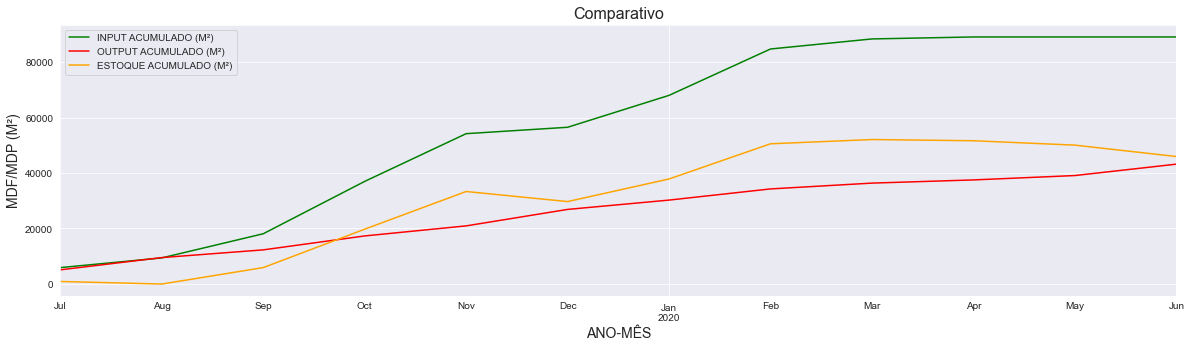

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.set_title('Comparativo', fontsize=16)
ax.set_ylabel('MDF/MDP (M²)', fontsize=14)
ax.set_xlabel('Período', fontsize=14)
ax = comparativo['INPUT ACUMULADO (M²)'].plot(color='green', legend=True)
ax = comparativo['OUTPUT ACUMULADO (M²)'].plot(color='red', legend=True)
ax = comparativo['ESTOQUE ACUMULADO (M²)'].plot(color='orange', legend=True)
plt.savefig('Comparativo.png')
plt.show(ax)

<hr>

## Faturamento (Outputs em US$)

### Cotação do Dia

In [9]:
cotacao = pd.to_datetime(cotacao, format='%m-%d-%Y').strftime('%d/%m/%Y')

print(f'CONSIDERANDO:\n* Dólar: R$ {dolar_dia.round(2)}\n* Cotação referente ao dia: {cotacao}')
faturamento = pd.DataFrame(saida.groupby([Grouper(key='DATA_EMISSAO', freq='MS'),'COD_CLIENTE','NOM_CLIENTE','NOTA_FISCAL','ITEM_FINAL','DESCRICAO'])['VAL_ITEM_NF'].max()).reset_index()
faturamento = pd.DataFrame(faturamento.groupby([Grouper(key='DATA_EMISSAO', freq='MS')])['VAL_ITEM_NF'].sum()).reset_index()
faturamento = faturamento.tail(13).head(12).rename(columns={'DATA_EMISSAO':'ANO-MÊS','VAL_ITEM_NF':'TOTAL FATURADO (R$)'})
faturamento['ACUMULADO (R$)'] = faturamento['TOTAL FATURADO (R$)'].cumsum()
faturamento['TOTAL FATURADO (US$)'] = (faturamento['TOTAL FATURADO (R$)']/dolar_dia)
faturamento['ACUMULADO (US$)'] = faturamento['TOTAL FATURADO (US$)'].cumsum()
faturamento = faturamento.set_index('ANO-MÊS').round(2).to_period('M')
faturamento

CONSIDERANDO:
* Dólar: R$ 5.21
* Cotação referente ao dia: 24/07/2020


,TOTAL FATURADO (R$),ACUMULADO (R$),TOTAL FATURADO (US$),ACUMULADO (US$)
ANO-MÊS,,,,
2019-07,1636864.55,1636864.55,313936.43,313936.43
2019-08,1149120.06,2785984.61,220391.27,534327.70
2019-09,885274.88,3671259.49,169788.05,704115.74
2019-10,1584423.17,5255682.66,303878.63,1007994.37
2019-11,1255472.17,6511154.83,240788.68,1248783.05
2019-12,2070036.16,8581190.99,397014.99,1645798.04
2020-01,1107399.84,9688590.83,212389.69,1858187.73
2020-02,1538175.61,11226766.44,295008.75,2153196.48
2020-03,708783.97,11935550.41,135938.62,2289135.10


### Taxa de Administração Anual (AAF)

Classe 3: Superior a US$ 1000000.0 e inferior a US$ 5000000.0.
Faturamento: US$ 2583465.16


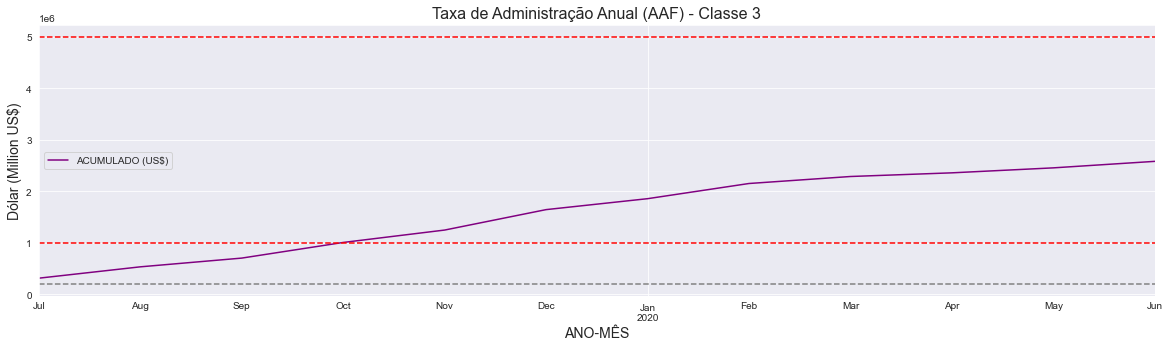

In [10]:
faturamento_periodo = faturamento['ACUMULADO (US$)'].max().round(2)
classe_1 = 200000.00
classe_2 = 1000000.00
classe_3 = 5000000.00

if faturamento_periodo < classe_1:
    classe = 'Classe 1'
    print(f'{classe}: Inferior a US$ {classe_1}.\nFaturamento: US$ {faturamento_periodo}')
    cores = ['red','gray','gray']
if faturamento_periodo < classe_2:
    classe = 'Classe 2'
    print(f'{classe}: Superior a US$ {classe_1} e inferior a US$ {classe_2}.\nFaturamento: US$ {faturamento_periodo}')
    cores = ['red','red','gray']
if faturamento_periodo < classe_3:
    classe = 'Classe 3'
    print(f'{classe}: Superior a US$ {classe_2} e inferior a US$ {classe_3}.\nFaturamento: US$ {faturamento_periodo}')
    cores = ['gray','red','red']
else:
    cores = ['gray','gray','red']

fig, ax = plt.subplots(figsize=(20, 5))

ax.set_title(f'Taxa de Administração Anual (AAF) - {classe}', fontsize=16)
ax.set_ylabel('Dólar (Million US$)', fontsize=14)
ax.set_xlabel('Período', fontsize=14)
ax = faturamento['ACUMULADO (US$)'].plot(color='purple', legend=True)
classe1 = ax.axhline(y=classe_1, color=cores[0],linestyle='--', label='Classe_1')
classe2 = ax.axhline(y=classe_2, color=cores[1],linestyle='--', label='Classe_2')
classe3 = ax.axhline(y=classe_3, color=cores[2],linestyle='--', label='Classe_3')
plt.savefig(f'{classe} - Taxa AAF.png')
plt.show(ax)

<hr>

In [11]:
#Exportando para 'Analise_FSC.xlsx':
with ExcelWriter('G:\PUBLICO\Analise_FSC.xlsx') as writer:
    entrada.to_excel(writer, index=False, sheet_name='entrada')
    saida.to_excel(writer, index=False, sheet_name='saida')